# [Introduction to Statistics](https://www.youtube.com/watch?v=XZo4xyJXCak&list=PL0o_zxa4K1BVsziIRdfv4Hl4UIqDZhXWV&ab_channel=TheOrganicChemistryTutor)

## Mean, median, mode, range

```
10,7,14,23,15,7,32
mean: 15.43
median: 14
mode: 7
range: 25

15,21,59,15,37,59,11,41
mean: 32.25
median: 29
mode: 15, 59
range: 48
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import norm
from scipy.stats import skewnorm
import stemgraphic

In [2]:
np.random.seed(42)

In [3]:
# data = [10,7,14,23,15,7,32]
data = [15,21,59,15,37,59,11,41]
df = pd.DataFrame(data)
df

,0
0,15
1,21
2,59
3,15
4,37
5,59
6,11
7,41


In [4]:
df.mean()

0    32.25
dtype: float64

In [5]:
# TODO: Why Series
type(df.mean())

pandas.core.series.Series

In [6]:
df.mean().round(2)

0    32.25
dtype: float64

In [7]:
df.median()

0    29.0
dtype: float64

In [8]:
df.mode()

,0
0,15
1,59


In [9]:
type(df.mode())

pandas.core.frame.DataFrame

In [10]:
# range
df.max()-df.min()

0    48
dtype: int64

## IQR

```
7,11,14,5,8,27,16,10,13,17,16
Q1: 8
Q2: 13
Q3: 16
IQR: 8
27 is not an outlier

16,18,28,13,50,31,25,22,18,23,29,38
Q1: 18
Q2: 24
Q3: 30
boxplot
```

In [11]:
# data = [7,11,14,5,8,27,16,10,13,17,16]
data = [16,18,28,13,50,31,25,22,18,23,29,38]
df = pd.DataFrame(data)
df

,0
0,16
1,18
2,28
3,13
4,50
5,31
6,25
7,22
8,18
9,23


See: [Pandas IQR: Calculate the Interquartile Range in Python](https://datagy.io/pandas-iqr/)

In [12]:
# TODO: interpolation param
# quartiles = df[0].quantile([0.25, 0.5, 0.75], interpolation='nearest')
quartiles = df[0].quantile([0.25, 0.5, 0.75], interpolation='midpoint')
quartiles

0.25    18.0
0.50    24.0
0.75    30.0
Name: 0, dtype: float64

In [13]:
q1 = quartiles[0.25]
q2 = quartiles[0.5]
q3 = quartiles[0.75]
iqr = q3 - q1
iqr

12.0

In [14]:
[q1 - 1.5 * iqr, q3 + 1.5 * iqr]

[0.0, 48.0]

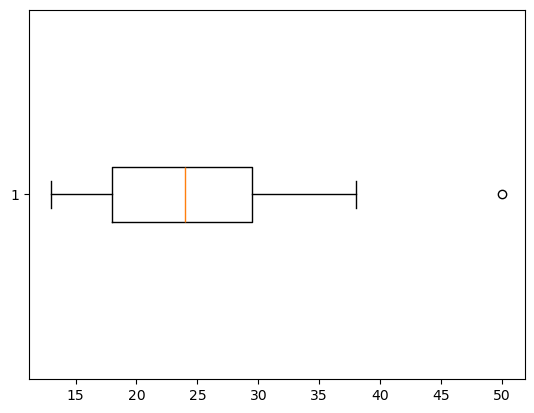

In [15]:
plt.boxplot(data, vert=False)
plt.show()

## Distributions

See: [Generate dataset with normal distribution in Python](https://www.reneshbedre.com/blog/random-dataset-norm-distribution-python.html)

### Normal Distribution

In [16]:
data = np.random.normal(loc=0, scale=1, size=500)
data.shape

(500,)

In [17]:
print(st.mean(data))
print(st.median(data))
print(st.mode(data))

0.006837994588647582
0.01279714632985094
0.4967141530112327


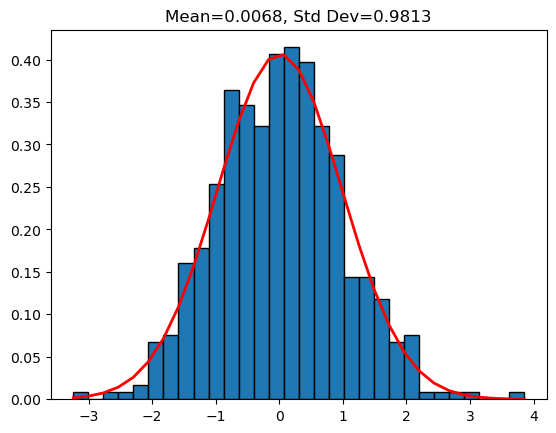

In [18]:
h = plt.hist(data, bins=30, histtype='bar', density=1, ec='k') 
plt.plot(h[1], norm.pdf(h[1], st.mean(data), st.stdev(data)), color='r', linewidth=2)
plt.title(r'Mean=%.4f, Std Dev=%.4f' %(st.mean(data), st.stdev(data)))
plt.show()

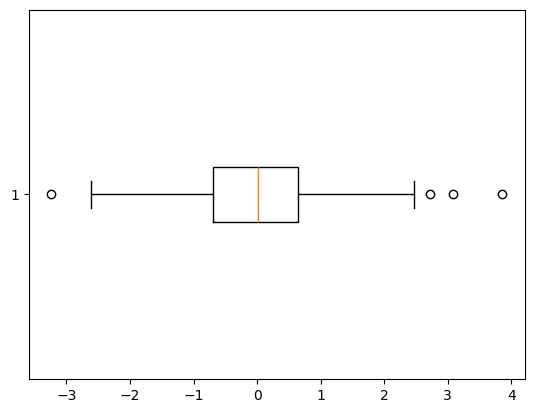

In [19]:
# TODO: is there a difference between boxplot and whiscaker plot
plt.boxplot(data, vert=False)
plt.show()

### Left Skewed Distribution

In [20]:
# See: https://stackoverflow.com/questions/24854965/create-random-numbers-with-left-skewed-probability-distribution
numValues = 10000
maxValue = 100
skewness = -5   # Negative values are left skewed, positive values are right skewed
data = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function
data.shape

(10000,)

In [21]:
print(st.mean(data))
print(st.median(data))
print(st.mode(data))

99.21526998714381
99.32630802192372
99.39408614055687


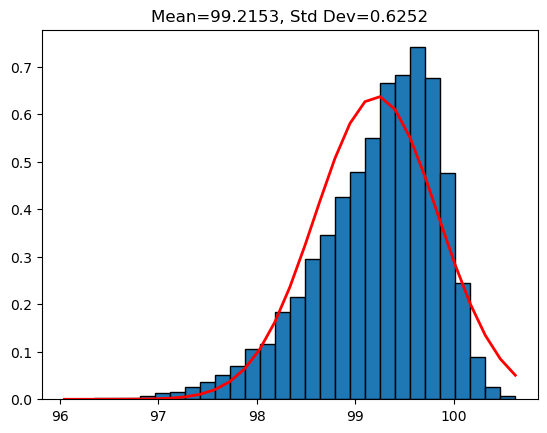

In [22]:
h = plt.hist(data, bins=30, histtype='bar', density=1, ec='k') 
plt.plot(h[1], norm.pdf(h[1], st.mean(data), st.stdev(data)), color='r', linewidth=2)
plt.title(r'Mean=%.4f, Std Dev=%.4f' %(st.mean(data), st.stdev(data)))
plt.show()

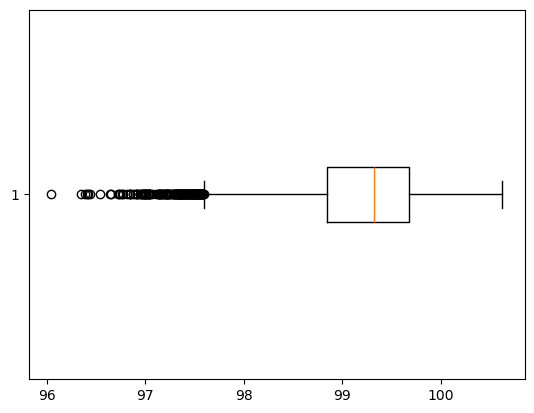

In [23]:
plt.boxplot(data, vert=False)
plt.show()

### Right Skewed Distribution

In [24]:
# See: https://stackoverflow.com/questions/24854965/create-random-numbers-with-left-skewed-probability-distribution
numValues = 10000
maxValue = 100
skewness = 5   # Negative values are left skewed, positive values are right skewed
data = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function
data.shape

(10000,)

In [25]:
print(st.mean(data))
print(st.median(data))
print(st.mode(data))

100.776646347185
100.67332723191242
101.13687565819924


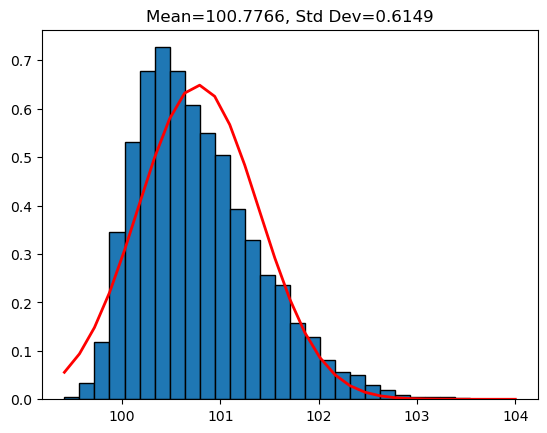

In [26]:
h = plt.hist(data, bins=30, histtype='bar', density=1, ec='k') 
plt.plot(h[1], norm.pdf(h[1], st.mean(data), st.stdev(data)), color='r', linewidth=2)
plt.title(r'Mean=%.4f, Std Dev=%.4f' %(st.mean(data), st.stdev(data)))
plt.show()

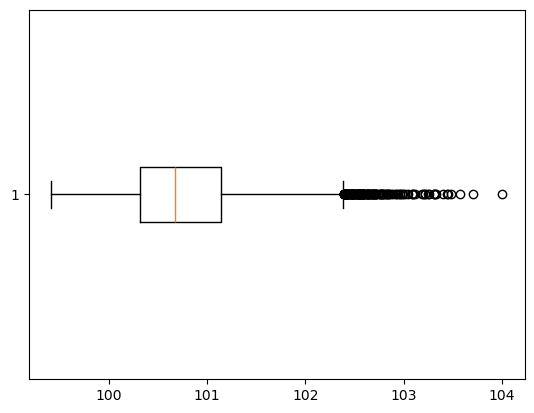

In [27]:
plt.boxplot(data, vert=False)
plt.show()

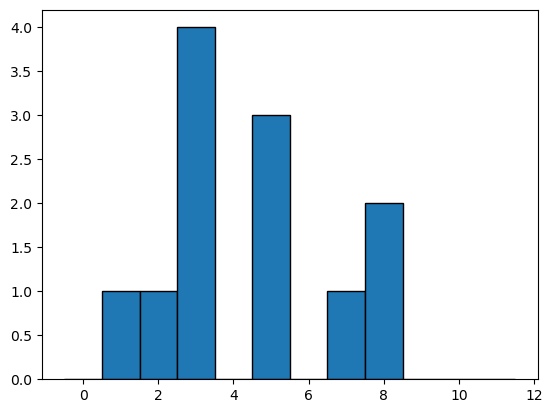

In [28]:
# See: https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot
# dot plot
data = [5,8,3,7,1,5,3,2,3,3,8,5]
plt.hist(data, bins=np.arange(13)-0.5, ec="k")
plt.show()

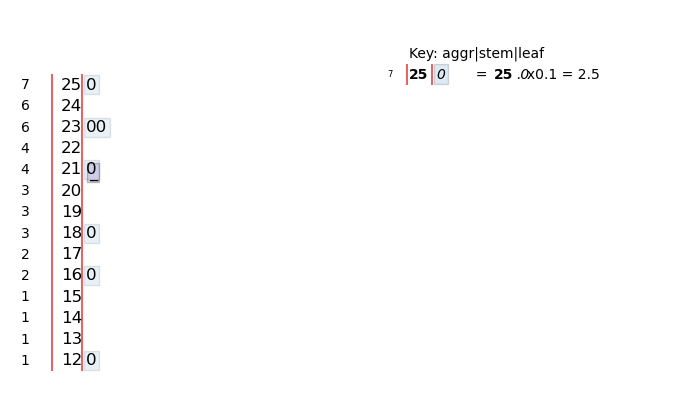

In [29]:
# TODO: only didactic or is used in real life?
# https://stackoverflow.com/questions/45655321/is-there-a-pandas-function-for-creating-a-stem-and-leaf-plot
x = [
    # 4,9,13,13,17,21,36,38,38,38,56
    # 78,85,89,92,106,107,119
    1.2, 1.6, 1.8, 2.1, 2.3, 2.3, 2.5
]
y = pd.Series(x)
fig, ax = stemgraphic.stem_graphic(y)

In [30]:
# TODO: usage in real life
# https://www.geeksforgeeks.org/how-to-create-frequency-tables-in-python/
data = [5,9,8,7,8,12,9,8,10,8,9,7]
df = pd.DataFrame(data)
pd.crosstab(index=df[0], columns='count') 

col_0,count
0,
5,1
7,2
8,4
9,3
10,1
12,1


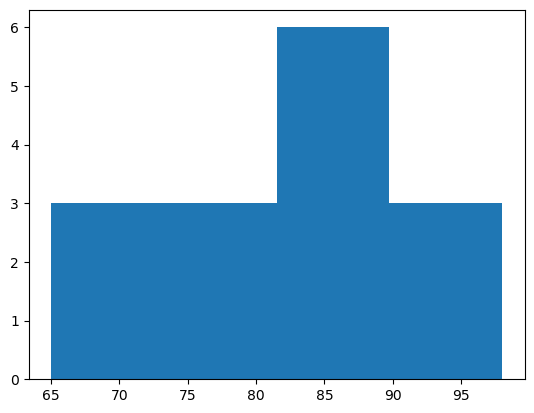

In [31]:
# https://www.geeksforgeeks.org/how-to-create-frequency-tables-in-python/
data = [65,72,93,68,76,98,84,85,79,88,90,82,83,87,78]
df = pd.DataFrame(data)
plt.hist(df, bins=4)
plt.show()

## Q&A
- `df[0].quantile([0.25, 0.5, 0.75], interpolation='midpoint')`
- why mean != median != mode on a normal distribution?
- why outliers on the generated normal distribution?